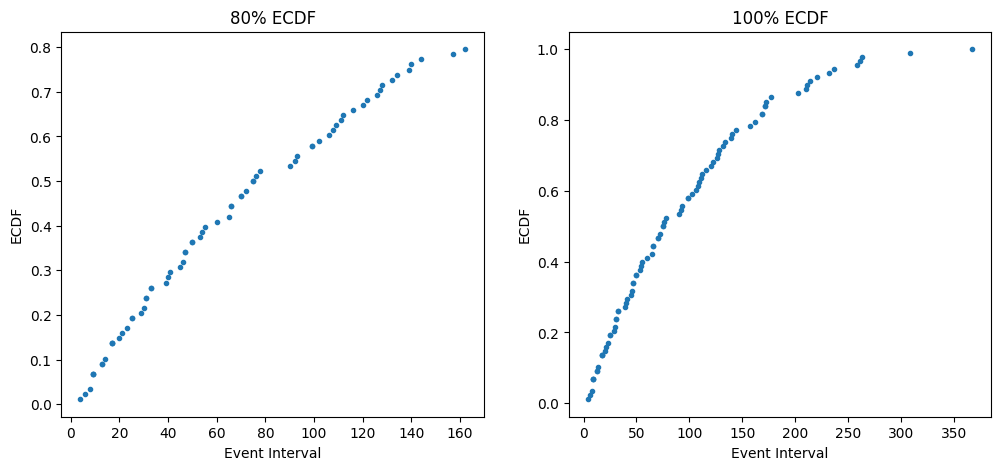

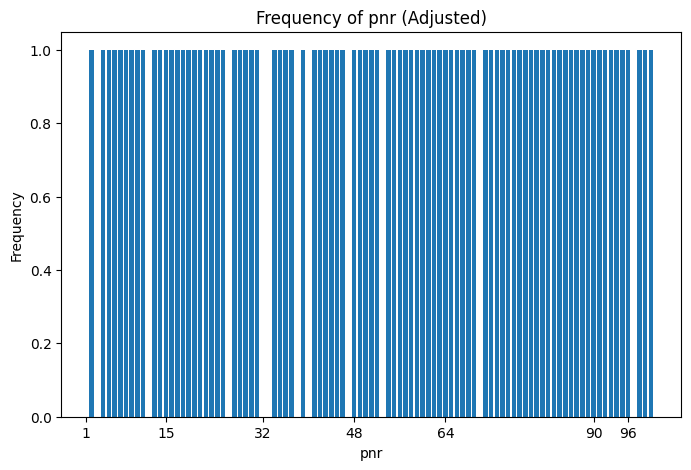

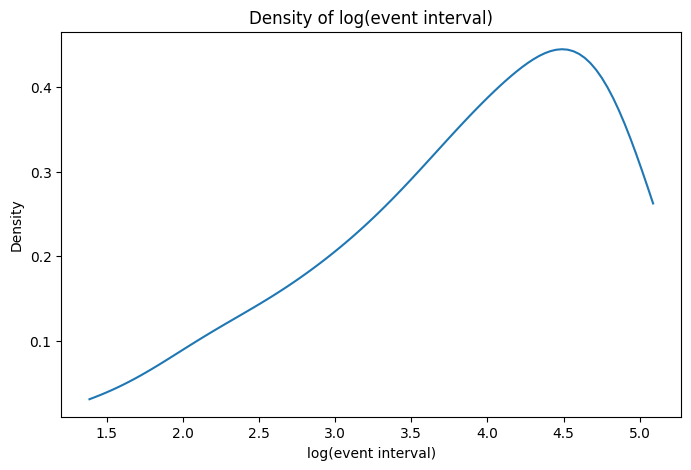

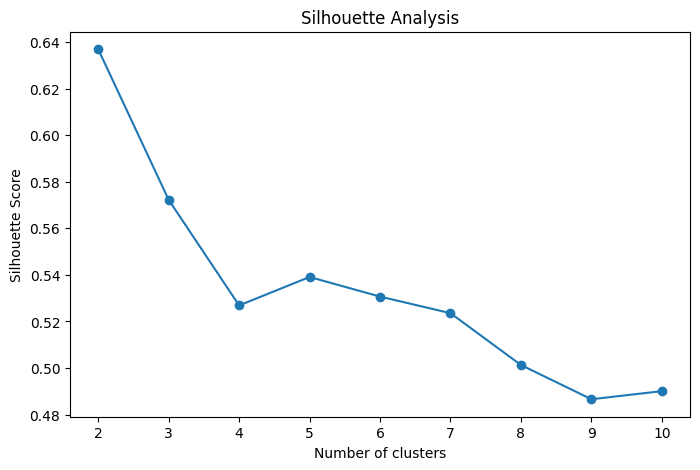

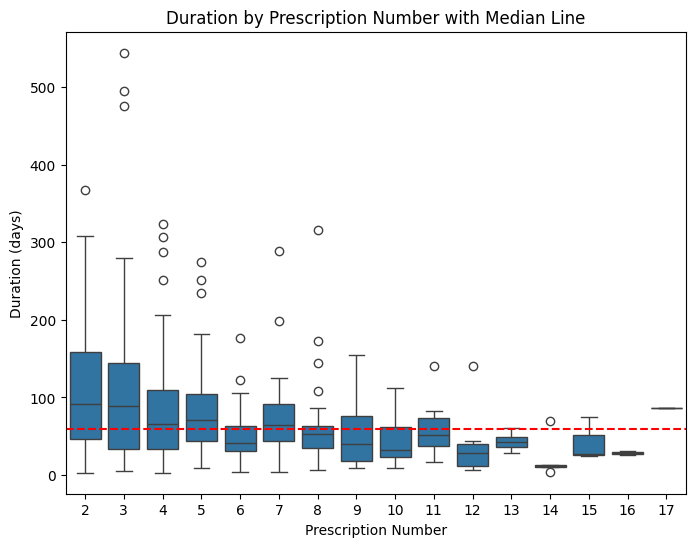

In [11]:
import SEE_KMeans_Sep as analysis

medA = analysis.See("medA")
analysis.see_assumption(medA)

In [12]:
# Run patient_sampling on a filtered dataset (e.g., only medA data)
medA_data = analysis.tidy[analysis.tidy['ATC'] == "medA"].copy()
sampled = analysis.patient_sampling(medA_data)
print(sampled.head())

   pnr       eksd  prev_eksd  event.interval
0    2 2036-03-10 2036-01-20            50.0
1    4 2032-11-27 2032-05-01           210.0
2    5 2032-03-04 2032-01-25            39.0
3    6 2037-03-24 2037-01-07            76.0
4    7 2042-07-30 2042-04-05           116.0


In [13]:
df_ecdf_80, df_ecdf, ni = analysis.ecdf_computation(sampled)
print("80% cutoff (ni):", ni)
df_ecdf.head()  # Look at the full ECDF DataFrame

80% cutoff (ni): 162.0


,x,y
0,4.0,0.011364
1,6.0,0.022727
2,8.0,0.034091
3,9.0,0.068182
4,9.0,0.068182


In [14]:
# Make sure to use the same subset as used in your pipeline:
sampled_subset = sampled[sampled['event.interval'] <= ni].copy()
x_grid, y_kde = analysis.density_estimation(sampled_subset)
print("x_grid:", x_grid[:5])
print("y_kde:", y_kde[:5])

x_grid: [1.38629436 1.42368125 1.46106814 1.49845503 1.53584192]
y_kde: [0.0314671  0.03401991 0.03670162 0.0395196  0.04248047]


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create a DataFrame from your KDE data for scaling:
kde_df = pd.DataFrame({'x': x_grid, 'y': y_kde})
scaler = StandardScaler()
kde_scaled = scaler.fit_transform(kde_df)

scores, optimal_k = analysis.silhouette_analysis(kde_scaled)
print("Silhouette Scores:", scores)
print("Optimal K:", optimal_k)

Silhouette Scores: {2: 0.6369640248878585, 3: 0.5722636716459011, 4: 0.5268720650263746, 5: 0.5390858026379999, 6: 0.5306642495133087, 7: 0.5235388999465881, 8: 0.5012738753750302, 9: 0.48656567569799025, 10: 0.4900306164728464}
Optimal K: 2
